In [21]:
import os
import cv2
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

In [2]:
image_directory='Dataset/'

no_covid_images=os.listdir(image_directory+ 'Normal/')
yes_covid_images=os.listdir(image_directory+ 'COVID-19/')

dataset=[]
label=[]

INPUT_SIZE=64

In [3]:
for i , image_name in tqdm(enumerate(no_covid_images)):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'Normal/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

for i , image_name in tqdm(enumerate(yes_covid_images)):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'COVID-19/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

3270it [02:53, 18.83it/s]
1281it [01:12, 17.61it/s]


In [4]:
dataset=np.array(dataset)
label=np.array(label)

x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.1, random_state=0)

x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

y_train=tf.keras.utils.to_categorical(y_train , num_classes=2)
y_test=tf.keras.utils.to_categorical(y_test , num_classes=2)

In [5]:
model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [6]:
model.layers

In [7]:
len(model.layers)

15

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

In [10]:
history = model.fit(x_train, y_train, 
batch_size=32, 
verbose=1, epochs=100, 
validation_data=(x_test, y_test),
shuffle=False)

Epoch 1/100
128/128 [==============================] - 48s 48ms/step - loss: 0.4246 - accuracy: 0.7863 - val_loss: 0.1490 - val_accuracy: 0.9605
Epoch 2/100
128/128 [==============================] - 5s 36ms/step - loss: 0.1594 - accuracy: 0.9535 - val_loss: 0.1064 - val_accuracy: 0.9627
Epoch 3/100
128/128 [==============================] - 5s 36ms/step - loss: 0.1382 - accuracy: 0.9655 - val_loss: 0.0847 - val_accuracy: 0.9671
Epoch 4/100
128/128 [==============================] - 5s 36ms/step - loss: 0.1073 - accuracy: 0.9708 - val_loss: 0.0798 - val_accuracy: 0.9737
Epoch 5/100
128/128 [==============================] - 5s 36ms/step - loss: 0.0941 - accuracy: 0.9750 - val_loss: 0.0733 - val_accuracy: 0.9649
Epoch 6/100
128/128 [==============================] - 5s 37ms/step - loss: 0.0884 - accuracy: 0.9766 - val_loss: 0.0590 - val_accuracy: 0.9759
Epoch 7/100
128/128 [==============================] - 5s 36ms/step - loss: 0.0804 - accuracy: 0.9787 - val_loss: 0.0592 - val_accuracy

In [11]:
%%time
print("Evaluating on test data ....")
results = model.evaluate(x_test, y_test, batch_size=32)
print("test loss, test acc:", results)

Evaluating on test data ....
15/15 [==============================] - 0s 15ms/step - loss: 0.0292 - accuracy: 0.9956
test loss, test acc: [0.029194695875048637, 0.9956140518188477]
Wall time: 312 ms


In [12]:
history.history

{'loss': [0.29943808913230896,
  0.15748094022274017,
  0.12627890706062317,
  0.09953762590885162,
  0.09176409989595413,
  0.08037804067134857,
  0.0740128606557846,
  0.0794869139790535,
  0.06014084815979004,
  0.056103289127349854,
  0.050332386046648026,
  0.04558528959751129,
  0.037842757999897,
  0.03458153456449509,
  0.0438782200217247,
  0.026658473536372185,
  0.028069935739040375,
  0.02236977592110634,
  0.0208088718354702,
  0.01749458722770214,
  0.015292267315089703,
  0.013112829066812992,
  0.015992768108844757,
  0.0107215391471982,
  0.007592340465635061,
  0.009098134003579617,
  0.010450145229697227,
  0.012357091531157494,
  0.006443816237151623,
  0.014196167699992657,
  0.007258576340973377,
  0.004173990339040756,
  0.007600343320518732,
  0.0035190917551517487,
  0.0022254460491240025,
  0.0015251374570652843,
  0.0009965344797819853,
  0.03872523456811905,
  0.006489619612693787,
  0.0030244775116443634,
  0.0033953592646867037,
  0.007352747488766909,
  0

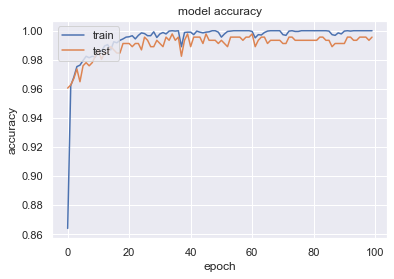

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

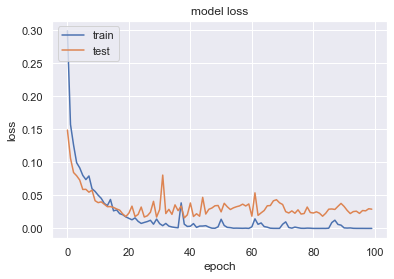

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
%%time
model.predict(x_train)

Wall time: 2.19 s


array([[1.0000000e+00, 5.3025104e-34],
       [1.0000000e+00, 1.3543478e-11],
       [1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 2.8492087e-18],
       [1.0000000e+00, 1.2855645e-11],
       [1.0000000e+00, 4.8476620e-27]], dtype=float32)

In [16]:
%%time
y_pred = model.predict(x_test)

Wall time: 216 ms


In [17]:
Y_pred = np.argmax(y_pred, axis=1)

In [18]:
Y_test = np.argmax(y_test, axis=1)

In [19]:
%%time
result = model.predict(x_test[[0]])

Wall time: 232 ms


In [22]:
cm1 = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[336   1]
 [  1 118]]
Accuracy :  0.9956140350877193
Sensitivity :  0.9970326409495549
Specificity :  0.9915966386554622


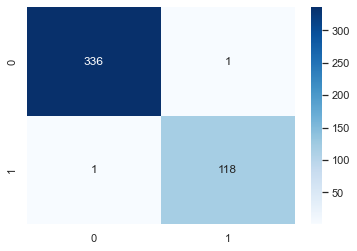

In [23]:
cm = sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap="Blues", annot=True,fmt="d")

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names = ['COVID', 'NORMAL']))

              precision    recall  f1-score   support

       COVID       1.00      1.00      1.00       337
      NORMAL       0.99      0.99      0.99       119

    accuracy                           1.00       456
   macro avg       0.99      0.99      0.99       456
weighted avg       1.00      1.00      1.00       456



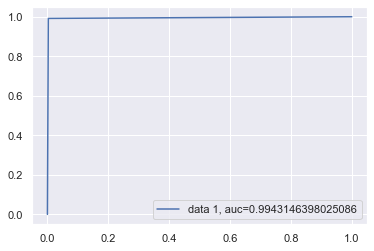

In [25]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.roc_auc_score(Y_test, Y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [26]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(Y_test, Y_pred, labels=["COVID", "Normal"])

(array([0.26096491, 0.99159664, 1.        ]),
 array([1.        , 0.99159664, 0.        ]),
 array([0, 1], dtype=int64))

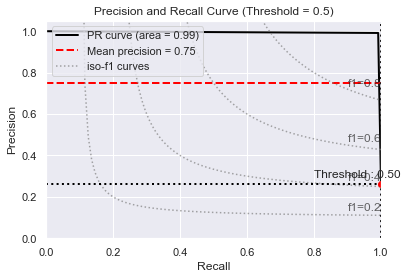

In [27]:
bc.plot_precision_recall_curve()

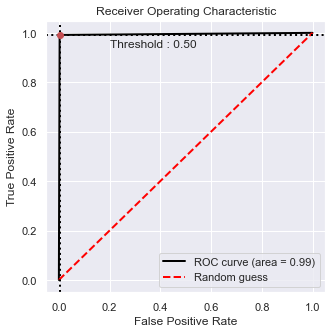

In [28]:
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

,True Class,Predicted Proba,Predicted Type,Predicted Class
0,0,0,TN,COVID
1,1,1,TP,Normal
2,0,0,TN,COVID
3,0,0,TN,COVID
4,0,0,TN,COVID
...,...,...,...,...
451,0,0,TN,COVID
452,1,1,TP,Normal
453,0,0,TN,COVID
454,1,1,TP,Normal


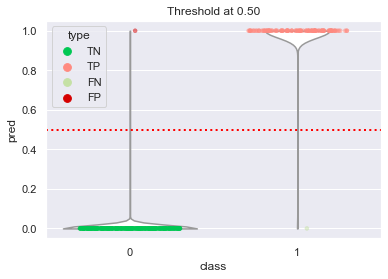

In [29]:
bc.plot_class_distribution()

array([[336,   1],
       [  1, 118]], dtype=int64)

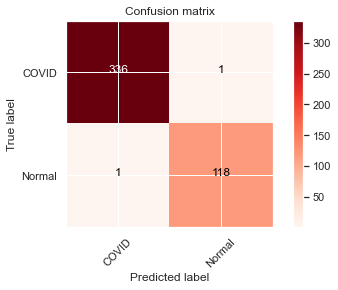

In [30]:
bc.plot_confusion_matrix()

array([[0.99703264, 0.00296736],
       [0.00840336, 0.99159664]])

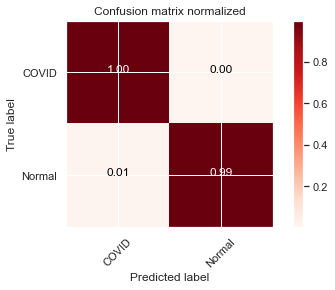

In [31]:
bc.plot_confusion_matrix(normalize=True)

In [32]:
bc.print_report()

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

       COVID       1.00      1.00      1.00       337
      Normal       0.99      0.99      0.99       119

    accuracy                           1.00       456
   macro avg       0.99      0.99      0.99       456
weighted avg       1.00      1.00      1.00       456



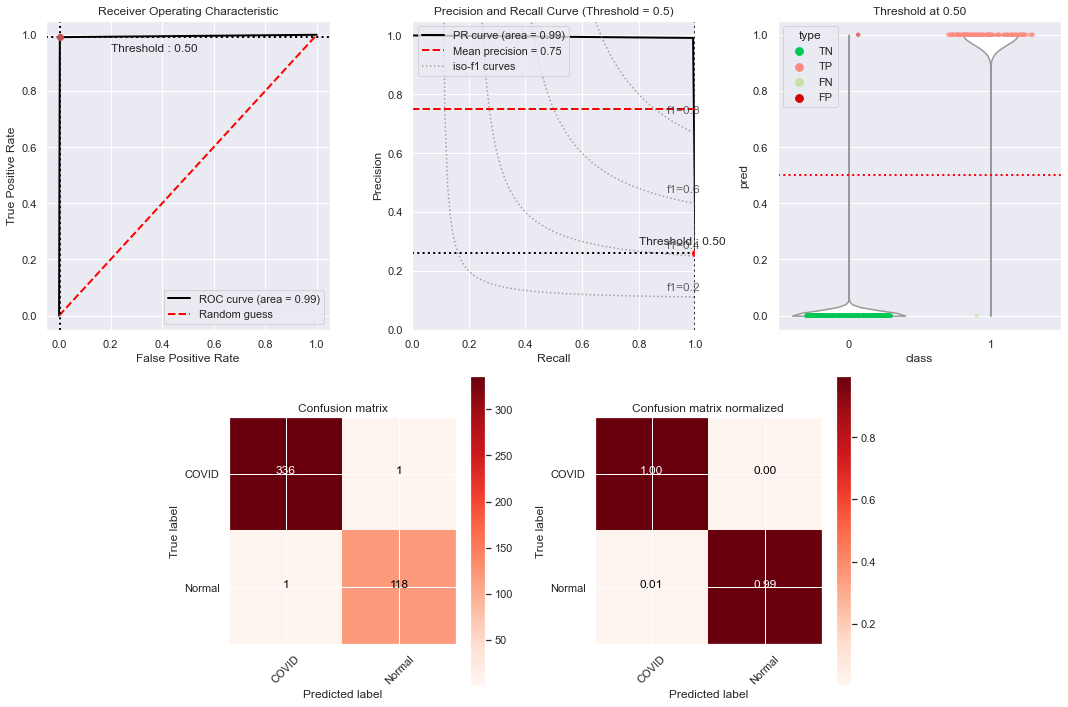

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

       COVID       1.00      1.00      1.00       337
      Normal       0.99      0.99      0.99       119

    accuracy                           1.00       456
   macro avg       0.99      0.99      0.99       456
weighted avg       1.00      1.00      1.00       456



In [33]:
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid((2,6), (0,2), colspan=2)
bc.plot_precision_recall_curve()
plt.subplot2grid((2,6), (0,4), colspan=2)
bc.plot_class_distribution()
plt.subplot2grid((2,6), (1,1), colspan=2)
bc.plot_confusion_matrix()
plt.subplot2grid((2,6), (1,3), colspan=2)
bc.plot_confusion_matrix(normalize=True)
plt.show()
bc.print_report()